# بسم الله الرحمن الرحيم

### Example 2: Binary Images
- The internal structure of most images is highly predictable
- For example
![](imgs/Lecture-06/stars.jpg)
  - most of the individual picture elements or pixels in the image of stars are black, with an occasional white pixel, a start
  - Because almost all pixels are black, it follows that most pirs of adjacent pixels are also black
  - which makes the image's internal structure predictable
  - If this picture were taken by the orbiting Hubble telescope then its predictable structure would allow it to be efficiently transmitted to Earth

### Task
Suppose you were in charge of writing the computer code which conveys the information in the previous figure from the Hubble telescope to Earth.

### Answer: Method A
- You could naively send the value of each pixel; let's call this method A
- Because there are only two values in this particular image (black and white) you could chose to indicate the colour black with the binary digit 0, and the colour white with a 1
- You would therefore need to send as many 0s and 1s as there are pixels in the image
- For example
  - if the image was 100 x 100 pixels then you would need to send ten thousands 0s or 1s for the image to be reconstructed on Earth
- Because almost all the pixels are black, you would send sequences of hundreds of 0s interrupted by the occasional 1
- It is not hard to see that this is a **wasteful use** of the expensive satellite communication channel

## Question: How could it be made more efficient?
### Answer: Method B
- consists of sending only the locations of the white pixels
- This would yield a code like [(19,13),(22,30),(43,15)...] where each pair of numbers represents the row and column of a white pixel

### Answer: Method C
- How it works
  - consists of concatenating all of the rows of the image,
  - and then sending the number of black pixels that occur before the next white pixel
- Example
  - If the number of black pixels that precede the first white pixel is 13 and there are 9 pixels before the next white pixel, 
  - then the first row of the image begins with $$000000000000010000000001...$$
  - and the code for communicating this would be [13,9,...]
- Clearly more compact than the 24 binary digits which begin the first row of the image

### Notes
- method A consists of sending the image itself
- methods B and C, do not send the image, but they do send all of the **information** required to reconstruct the image on Earth
- Crucially, the end results of all three methods are identical, and it is only the efficiency of the methods that differs
- In fact, whether A, B, or C is the most efficient method depends on the structure of the image
- This can be seen if we take an extreme example consisting of just one white pixel in the centre of the mage. For this image
  - method A is fairly useless, because it would require 10,000 binary values to be sent
  - method B would consist of two numbers (50,50)
  - method C would consist of a single number, 5,050
- If we ignore the brackets and commas then we end up with four decimal digits for both methods B and C
- So, these methods seem to be equivalent, at least for the example considered here
- For other images, with other structures, different *encoding methods* will be more or less efficient

### Run-Length encoding
- For example, if a figure contains just two grey-levels, but these occur in large regions of pure black or pure white
- In this case, it seems silly to se method B to send the location of every white pixel, because so many of them occur in long runs of white pixels
- This observation makes method C seem to be an obvious choice - but with slight change
- Because there are roughly equal numbers of black and white pixels which occur in regions of pure black or pure white, we could just send the number of pixels which precede the next change from black to white or from white to black
- This is known as **run-length encoding**

### Example 3: Grey-Level Images
- Suppose we wanted to transmit an image of 100 x 100 pixels, in which each pixel has more than two possible gry-level values
- A reasonable number of grey-levels turns out to be 256
- Generally, in grey-level images there are large regions that look as if they contain only one grey-level
- In fact, each such region contains grey-levels which are similar, but not identical
- The similarity between nearby pixel values means that adjacent pixel values are not **independent** of each other
- and the image has a dgree of **redundancy**
- Question: How this observation be used to encode the image?
  - One method consists of encoding the image in terms of the differences between the grey-level of adjacent pixels
  - For brevity, we will call this **Difference Coding**
- More complex methds exist, but most are similar in spirit to this simple method
- In principle, pixel differences could be measured in any direction within the image, but for simplicity, we concatenate consecutive rows to form a signle row of 10,000 pixels, and then take the difference between adjacent grey-levels
- We can see the result of difference coding by 'un-concatenating' the rows to reconstitute an image (later lectures)
- If adjacent pixel grey-levels in a given row are similar, then the difference between the grey-levels is close to zero

### Grey-Level Images
- The minimum grey level is 0. The maximum grey level depends on the digitisation depth of the image. 
- For an 8-bit-deep image it is 255. 
- In a binary image a pixel can only take on either the value 0 or the value 255. 
- In contrast, in a greyscale or colour image a pixel can take on any value between 0 and 255.

- In a colour image the grey level of each pixel can be calculated using the following formula:
  - Grey level = 0.299 * red component + 0.587 * green component + 0.114 * blue component

- This formula takes into account the colour sensitivity of the human eye making the presentation of the grey levels independent of colour and limited solely to the brightness of the individual pixels.

- A grey level histogram indicates how many pixels of an image share the same grey level. 
  - The x-axis shows the grey levels (e.g. from 0 to 255), 
  - the y-axis shows their frequency in the image. This information can be used to calculate a threshold.

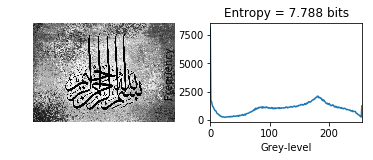

In [14]:
# to convert an image to a grey-level one, using linux terminal
# convert source.jpg -colorspace Gray destination.jpg
# Grey-level image
# (a) An image in which each pixel has one out of 256 possible grey-levels, between 0 and 255, 
# each of which can be represented by a binary number with 8 binary digits (e.g. 255=11111111)
# (b) Histogram of grey-levels in the picture
%matplotlib inline  
%run -i 'code/infotheory1_6.py'

### Notes
- In fact, a histogram of difference values shown below
- It shows that the most common difference values are indeed close to zero, and only rarely greater than 

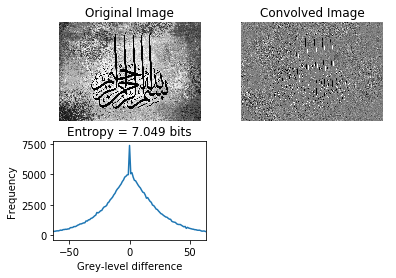

In [18]:
%run -i 'code/infotheory1_8.py'

### Notes
- In fact, a histogram of difference values shown above shows that the most common difference values are indeed close to zero, and only rarely greater than $\pm 50$
- Thus, using **difference coding** we could represent almost every one of the 9,999 difference values in previous figure as a number between -50 and +50
- In those rare cases where the grey-level difference is larger than $\pm 50$, we could list these separately as each pixel's location (row and column) as 2x7 binary digits, and its grey-level (8 binary digits)
- Most coding procedures have special 'housekeeping' fragments of computer code to deal with things like this, but these account for a negligible percentage of the total storage space required.
- For simplicity, we will assume that this percentage is zero

### Really?
- at first, it is not obvious how difference coding represents any saving over simply sending the value of each pixe's grey-level
- However, because these differences are between -50 and +50, they span a range of 101 values, i.e.[-50, -49, .., 0, .., +49, +50]
- Any number in this range can be represented using $\log 101$ that is 6.658211 $\approx 7$ for each pixel
- Once we have encoded an image into 9,999 differences (d1, d2, .. , d9,999) how do we use them to reconstruct the original image?
- Answer
  - If the difference d1 between the first pixel grey-level x1 and the second pixel grey-level x2 is, say $d1 = (x2-x1) = 10$ grey-levels and the grey-level of x1 is 5, then we obtain the original grey-level of x2 by adding 10 to x1; that is $x2=x1+d1$ so x2=5+10=15
  - we then continue this process for the third pixe $x3 = x2 + d2$ and so on
- Thus, provided we know the gry-level of the first pixel in the original image (which can be encoded as eight binary digits), we can use the pixel grey-level differences to recover the grey-level of every pixel in the original image.

### The fact that we can reconstruct the original image from the grey-level differences proves that they both contain exactly the same amount of information

### Efficiency 
- Let's work out the total saving rom using this **difference coding** method
- the native method of sending all pixel grey-levels, which vary between 0 and 255, would need 8 binary digits per pixel, requiring a total of 80,000 binary digits
- Using difference coding we would need seven binary digits per difference value, making a total of 70,000 binary digits
- Therefore, using difference coding provides a saving of 10,000 binary digits, or 12.5%

### In Practice
- a form of **difference coding** is used to reduce the amount of data required to transmit voices over the telephone, where it is known as **differential pulse code modulation**
- Using the differences between consecutive values, a voice signal which would otherwise require eight binary digits per value can be transmitted with just five binary digits
- A histogram of data values (e.g. image grey-levels) can be used to find an upper bound for the average amount of information each data value could convey

### Important Notes about Mid-Term Exam - Next Week إن شاء الله